# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | holualoa
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | marawi city
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | ripon
Processing Record 12 of Set 1 | al jawf
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | sosnovo-ozerskoye
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | belle fourche
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | longyearbyen
Processin

Processing Record 36 of Set 4 | ribeira grande
Processing Record 37 of Set 4 | lodwar
Processing Record 38 of Set 4 | vanimo
Processing Record 39 of Set 4 | puerto ayora
Processing Record 40 of Set 4 | satsuma
Processing Record 41 of Set 4 | ketchikan
Processing Record 42 of Set 4 | mejit
Processing Record 43 of Set 4 | sheridan
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | tazovsky
Processing Record 46 of Set 4 | rikaze
Processing Record 47 of Set 4 | prince george
Processing Record 48 of Set 4 | porto novo
Processing Record 49 of Set 4 | kyzyl-mazhalyk
Processing Record 0 of Set 5 | dukhan
Processing Record 1 of Set 5 | la'ie
Processing Record 2 of Set 5 | al kharijah
Processing Record 3 of Set 5 | tabas
Processing Record 4 of Set 5 | lethem
Processing Record 5 of Set 5 | aden
Processing Record 6 of Set 5 | tadine
Processing Record 7 of Set 5 | kayangel
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | vila nova de foz coa
Processing Reco

Processing Record 28 of Set 8 | bamboo flat
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | bria
Processing Record 31 of Set 8 | sabang
Processing Record 32 of Set 8 | bariadi
Processing Record 33 of Set 8 | vorgashor
Processing Record 34 of Set 8 | port glaud
City not found. Skipping...
Processing Record 35 of Set 8 | eirunepe
Processing Record 36 of Set 8 | port alberni
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | candido mendes
Processing Record 39 of Set 8 | port douglas
Processing Record 40 of Set 8 | posto fiscal rolim de moura
Processing Record 41 of Set 8 | la gi
Processing Record 42 of Set 8 | san luis de la loma
Processing Record 43 of Set 8 | tarko-sale
Processing Record 44 of Set 8 | sao vicente
Processing Record 45 of Set 8 | mombaca
Processing Record 46 of Set 8 | sinsang-ni
Processing Record 47 of Set 8 | yeppoon
Processing Record 48 of Set 8 | ugoofaaru
Processing Record 49 of Set 8 | kristiansund
Processing Record 0 of S

Processing Record 17 of Set 12 | kaizuka
Processing Record 18 of Set 12 | marataizes
Processing Record 19 of Set 12 | echuca
Processing Record 20 of Set 12 | savannah
Processing Record 21 of Set 12 | manado
Processing Record 22 of Set 12 | vredendal
-----------------------------
Data Retrieval Complete      
-----------------------------


In [27]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=d3ec7b14432f866814861f50106af03c&units=metric&q=vredendal'

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,0.15,98,100,0.17,RU,1699639719
1,margaret river,-33.9500,115.0667,11.67,91,1,5.12,AU,1699639539
2,holualoa,19.6228,-155.9522,24.88,69,40,1.34,US,1699639719
3,marawi city,8.0000,124.2833,20.53,96,27,0.50,PH,1699639721
4,bethel,41.3712,-73.4140,10.68,52,100,4.12,US,1699639557


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,0.15,98,100,0.17,RU,1699639719
1,margaret river,-33.9500,115.0667,11.67,91,1,5.12,AU,1699639539
2,holualoa,19.6228,-155.9522,24.88,69,40,1.34,US,1699639719
3,marawi city,8.0000,124.2833,20.53,96,27,0.50,PH,1699639721
4,bethel,41.3712,-73.4140,10.68,52,100,4.12,US,1699639557


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

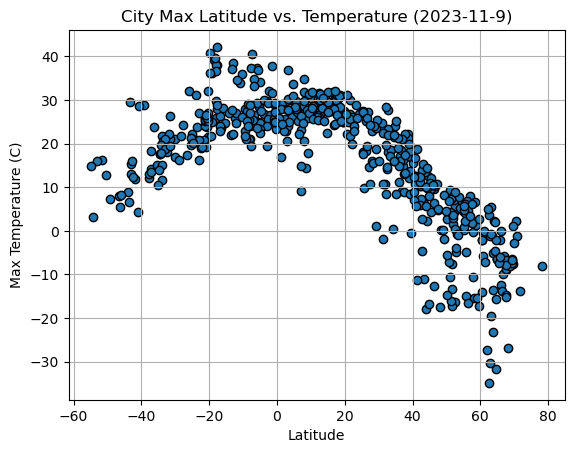

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-11-9)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

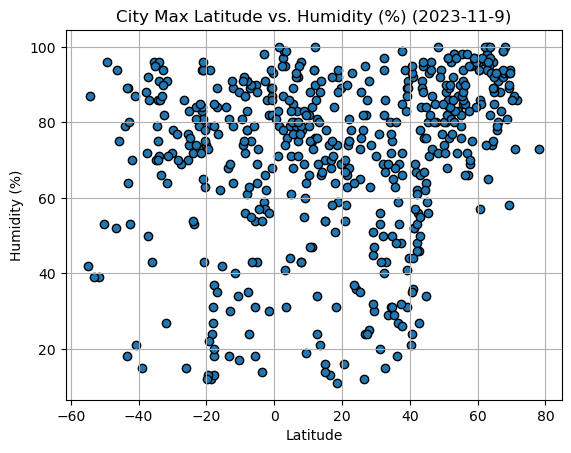

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (%) (2023-11-9)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

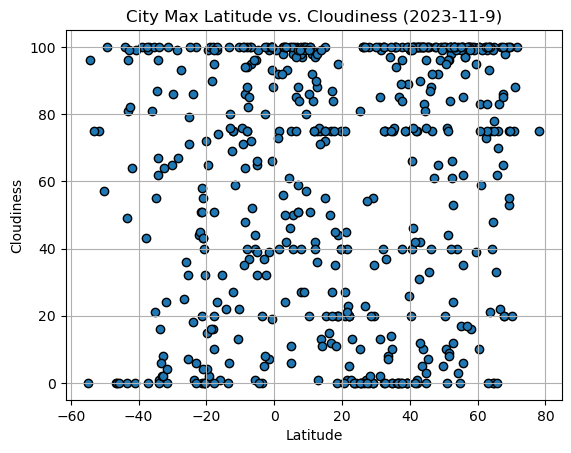

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-11-9)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

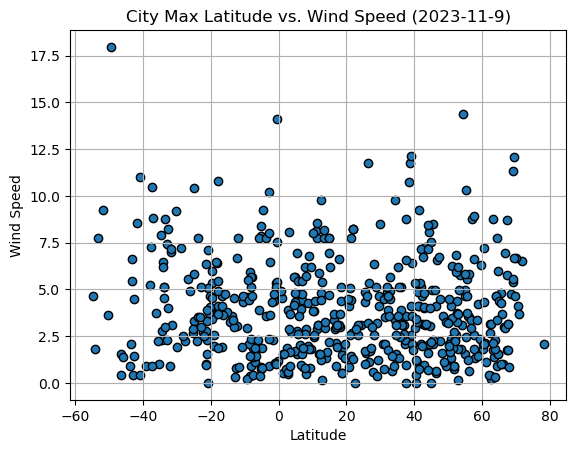

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-11-9)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots

def linear_regression_plot(df, x_col, y_col):

    x = df[x_col].values
    y = df[y_col].values
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    regression_line = slope * x + intercept
    
    equation = f'y={slope:.2f}x+{intercept:.2f}'
    annotation_position = (np.mean(x), np.max(y))
    plt.annotate(equation, xy=annotation_position, xycoords='data', ha='center', fontsize=14, color='red')            
    
    plt.scatter(x, y, edgecolor='black')
    
    plt.plot(x, regression_line, color='red', linewidth=2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    print(f'The r-value is:{r_value}')
    
    
    plt.show()
    
    

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,0.15,98,100,0.17,RU,1699639719
2,holualoa,19.6228,-155.9522,24.88,69,40,1.34,US,1699639719
3,marawi city,8.0000,124.2833,20.53,96,27,0.50,PH,1699639721
4,bethel,41.3712,-73.4140,10.68,52,100,4.12,US,1699639557
5,tiksi,71.6872,128.8694,-13.77,86,100,6.50,RU,1699639521


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,11.67,91,1,5.12,AU,1699639539
6,blackmans bay,-43.0167,147.3167,15.29,89,96,0.45,AU,1699639722
12,papatowai,-46.5619,169.4708,7.97,52,0,1.54,NZ,1699639723
14,puerto natales,-51.7236,-72.4875,16.25,39,75,9.26,CL,1699639724
15,grytviken,-54.2811,-36.5092,3.22,87,96,1.83,GS,1699639519


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8602082572525733


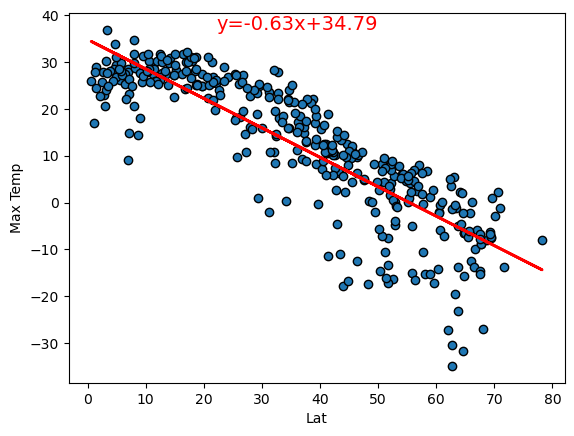

In [39]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Max Temp')

The r-value is:0.6542466167374149


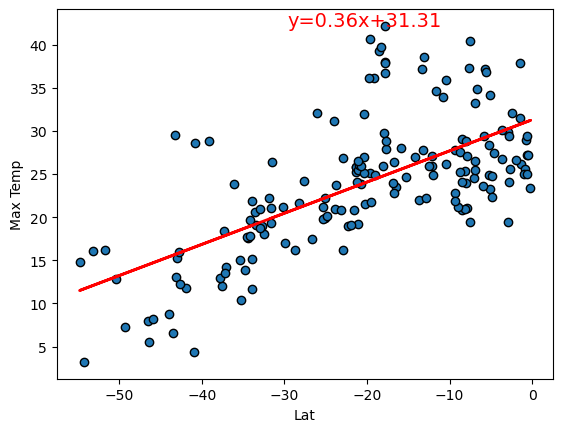

In [40]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** 
After reviewing the graphs, we can see that as we move futher away from the equator, on both sides southern and northern, the temperature starts dropping. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.278980585620404


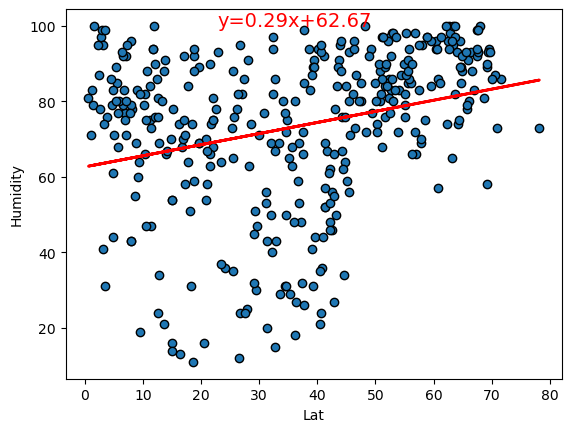

In [41]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Humidity')

The r-value is:-0.019084933848271896


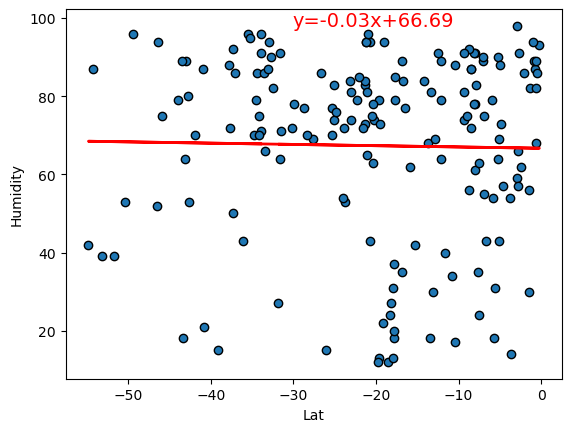

In [42]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** 

The northern hemisphere incrreases in humidity as we increase in latitude, while the souther hemisphere has a slight decline.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.0889467006146447


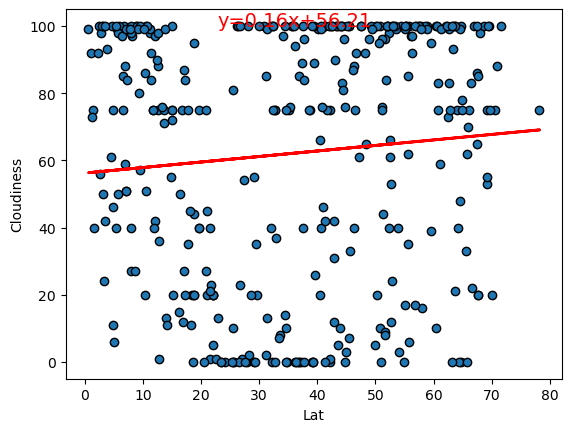

In [43]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Cloudiness')

The r-value is:0.08625631161086077


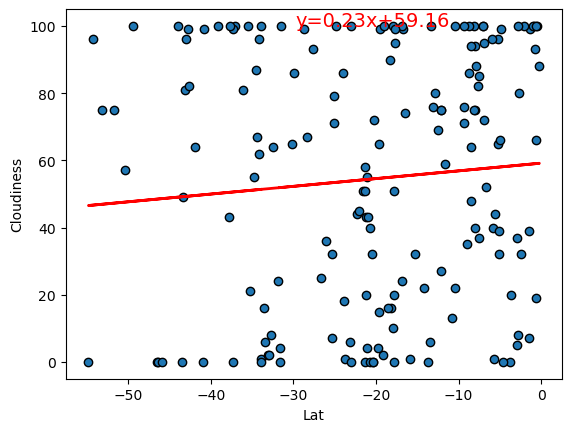

In [44]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:**

The graphs show us that the northern hemisphere clouds are a bit cloudier than the southern hemisphere and move away from the equator, while the southern hemisphere clouds move toward the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.04622927400164792


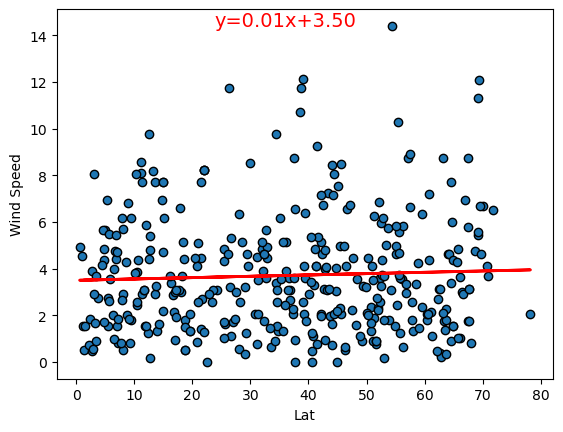

In [45]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Wind Speed')

The r-value is:-0.12666633169341185


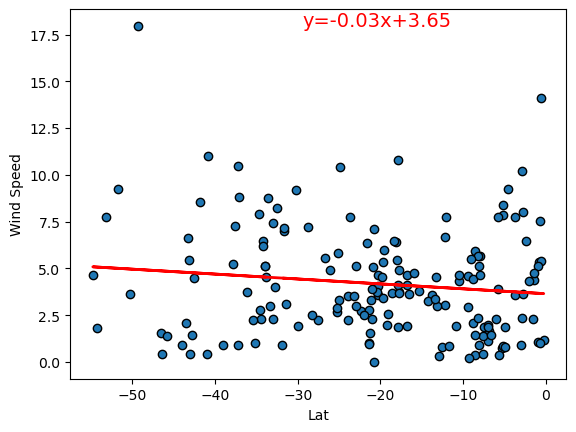

In [46]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** 

In the northern hemisphere the wind speed increases as latitude increases. In the southern hemisphere the wind speed declines as latitude increases. 